# Activation Functions in PyTorch

Apply different activation functions in Neural Network.

In [1]:
import torch.nn as nn
import torch

import matplotlib.pyplot as plt
torch.manual_seed(2)

### Create a tensor ranging from -10 to 10

In [4]:
z = torch.range(-10, 10, 0.1).view(-1, 1)

/var/folders/h0/1qbsqb5s27qgqgpdmd83xrx00000gn/T/ipykernel_3270/2656723452.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  z = torch.range(-10, 10, 0.1).view(-1, 1)


### Create sigmoid object


In [6]:
sig = nn.Sigmoid()
yhat = sig(z)


### Plot the result


Text(0, 0.5, 'yhat')

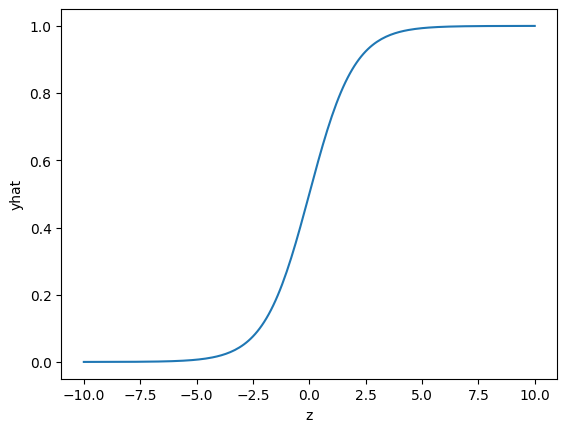

In [7]:
plt.plot(z.detach().numpy(),yhat.detach().numpy())
plt.xlabel('z')
plt.ylabel('yhat')

### For customization: use the built-in function

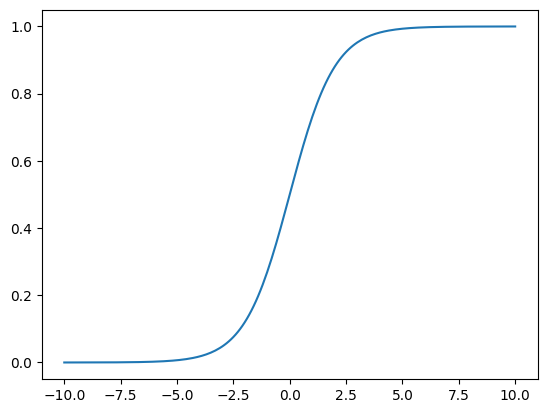

In [8]:
yhat = torch.sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())

plt.show()

## Tanh

In [13]:
TANH = nn.Tanh()

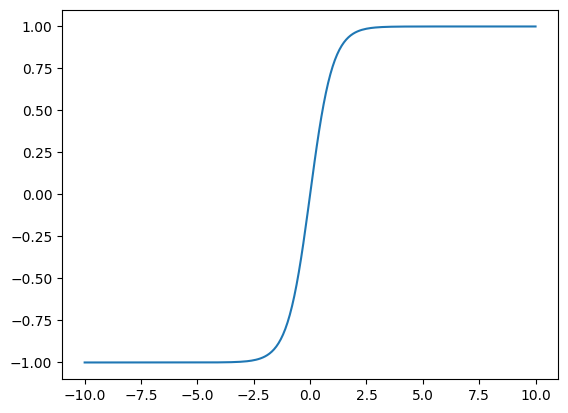

In [14]:
yhat = TANH(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

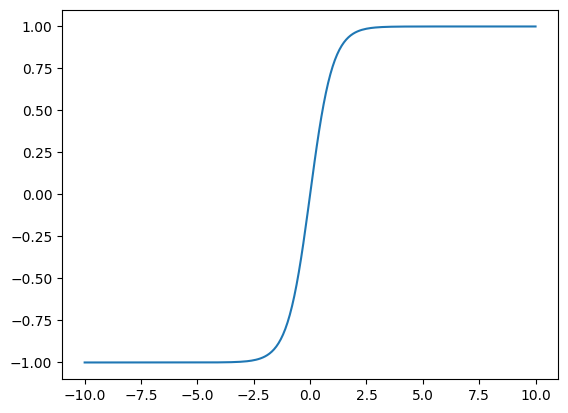

In [15]:
yhat = torch.tanh(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

## ReLU

In [16]:
RELU = nn.ReLU()

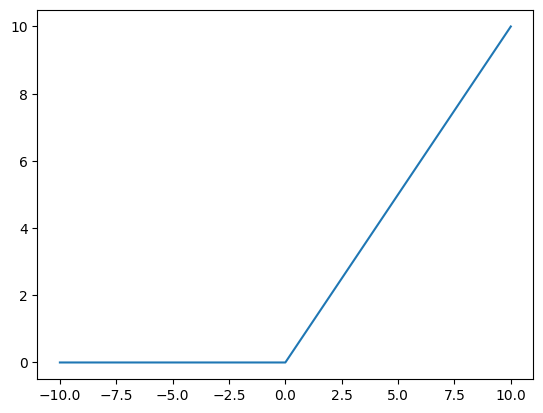

In [17]:
yhat = RELU(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

### Compare activation Functions

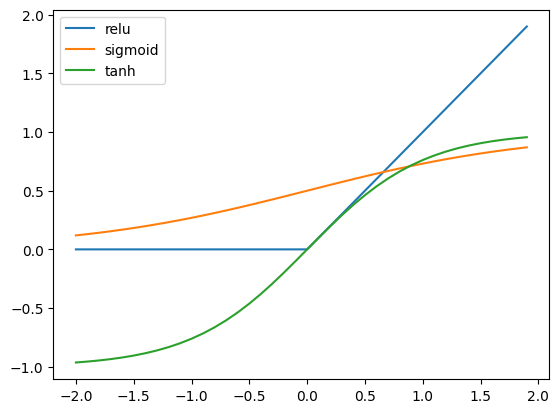

In [18]:
# Plot the results to compare the activation functions

x = torch.arange(-2, 2, 0.1).view(-1, 1)
plt.plot(x.numpy(), torch.relu(x).numpy(), label='relu')
plt.plot(x.numpy(), torch.sigmoid(x).numpy(), label='sigmoid')
plt.plot(x.numpy(), torch.tanh(x).numpy(), label='tanh')
plt.legend()

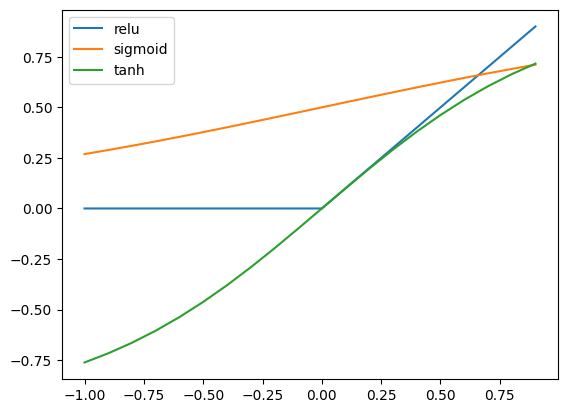

In [19]:
x = torch.arange(-1, 1, 0.1).view(-1, 1)
plt.plot(x.numpy(), torch.relu(x).numpy(), label = 'relu')
plt.plot(x.numpy(), torch.sigmoid(x).numpy(), label = 'sigmoid')
plt.plot(x.numpy(), torch.tanh(x).numpy(), label = 'tanh')
plt.legend()

In [ ]:
# Build the model with sigmoid function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

In [ ]:
# Build the model with Tanh function

class NetTanh(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

In [ ]:
# Build the model with Relu function

class NetRelu(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [ ]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff